In [12]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

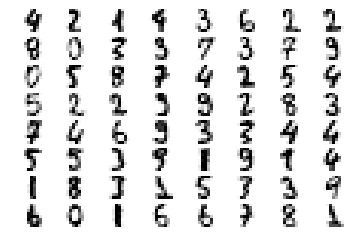

In [13]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [14]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [15]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [16]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 3)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [17]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [18]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.58916 stdev: 0.25932
Best fitness: 0.93321 - size: (2, 13) - species 1 - id 103
Average adjusted fitness: 0.511
Mean genetic distance 2.881, standard deviation 0.500
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.230 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.72131 stdev: 0.24671
Best fitness: 0.95795 - size: (3, 15) - species 2 - id 276
Average adjusted fitness: 0.648
Mean genetic distance 2.934, standard deviation 0.476
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 5.384 sec (5.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.78995 stdev: 0.21011
Best fitness: 0.95857 - size: (4, 18) - species 8 - id 505
Average adjusted fitness: 0.664
Mean genetic distance 3.036, standard deviation 0.460
Population of 199 members in 30 species
Total extincti


 ****** Running generation 0 ****** 

Population's average fitness: 0.56462 stdev: 0.19442
Best fitness: 0.85591 - size: (2, 13) - species 2 - id 116
Average adjusted fitness: 0.393
Mean genetic distance 2.884, standard deviation 0.463
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.536 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.66830 stdev: 0.18392
Best fitness: 0.86271 - size: (3, 14) - species 8 - id 354
Average adjusted fitness: 0.452
Mean genetic distance 2.986, standard deviation 0.473
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.495 sec (5.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72305 stdev: 0.14759
Best fitness: 0.87075 - size: (2, 14) - species 1 - id 470
Average adjusted fitness: 0.519
Mean genetic distance 3.059, standard deviation 0.493
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 5.861 sec (5.631 av


 ****** Running generation 0 ****** 

Population's average fitness: 0.56191 stdev: 0.20865
Best fitness: 0.85467 - size: (2, 13) - species 1 - id 115
Average adjusted fitness: 0.355
Mean genetic distance 2.829, standard deviation 0.477
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 6.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65875 stdev: 0.18476
Best fitness: 0.89177 - size: (3, 14) - species 8 - id 382
Average adjusted fitness: 0.444
Mean genetic distance 2.941, standard deviation 0.486
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.797 sec (6.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69387 stdev: 0.18061
Best fitness: 0.89177 - size: (3, 14) - species 8 - id 382
Average adjusted fitness: 0.540
Mean genetic distance 3.044, standard deviation 0.510
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.083 sec (6.077 av

Total extinctions: 0
Generation time: 6.720 sec (6.717 average)
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.52825 stdev: 0.15462
Best fitness: 0.80272 - size: (2, 13) - species 6 - id 10
Average adjusted fitness: 0.340
Mean genetic distance 2.910, standard deviation 0.472
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.391 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62487 stdev: 0.13675
Best fitness: 0.81633 - size: (2, 13) - species 6 - id 297
Average adjusted fitness: 0.445
Mean genetic distance 3.027, standard deviation 0.485
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.394 sec (6.393 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63535 stdev: 0.13419
Best fitness: 0.81633 - size: (2, 13) - species 26 - id 297
Average adjusted fitness: 0.466
Mean genetic distance 3.041, standard deviat


 ****** Running generation 0 ****** 

Population's average fitness: 0.57547 stdev: 0.20918
Best fitness: 0.87941 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.443
Mean genetic distance 2.890, standard deviation 0.452
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.140 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68479 stdev: 0.19010
Best fitness: 0.89177 - size: (3, 13) - species 12 - id 279
Average adjusted fitness: 0.481
Mean genetic distance 2.992, standard deviation 0.449
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.547 sec (5.343 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70333 stdev: 0.17005
Best fitness: 0.89177 - size: (3, 13) - species 12 - id 279
Average adjusted fitness: 0.481
Mean genetic distance 3.009, standard deviation 0.449
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 5.819 sec (5.502 


 ****** Running generation 0 ****** 

Population's average fitness: 0.55144 stdev: 0.16641
Best fitness: 0.85405 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.313
Mean genetic distance 2.885, standard deviation 0.515
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63158 stdev: 0.14355
Best fitness: 0.86766 - size: (3, 14) - species 2 - id 318
Average adjusted fitness: 0.471
Mean genetic distance 3.001, standard deviation 0.522
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.552 sec (5.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65016 stdev: 0.14970
Best fitness: 0.91466 - size: (3, 15) - species 1 - id 560
Average adjusted fitness: 0.473
Mean genetic distance 3.048, standard deviation 0.527
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 5.823 sec (5.522 ave

number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.54347 stdev: 0.15114
Best fitness: 0.74892 - size: (2, 13) - species 5 - id 12
Average adjusted fitness: 0.256
Mean genetic distance 2.953, standard deviation 0.489
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61673 stdev: 0.12529
Best fitness: 0.77798 - size: (3, 14) - species 12 - id 218
Average adjusted fitness: 0.383
Mean genetic distance 3.007, standard deviation 0.509
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.926 sec (5.659 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63932 stdev: 0.11976
Best fitness: 0.79530 - size: (3, 14) - species 5 - id 520
Average adjusted fitness: 0.324
Mean genetic distance 3.043, standard deviation 0.513
Population of 198 members in 30 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.053, standard deviation 0.473
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 8.681 sec (8.146 average)
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52614 stdev: 0.11055
Best fitness: 0.80519 - size: (2, 13) - species 7 - id 112
Average adjusted fitness: 0.278
Mean genetic distance 2.907, standard deviation 0.440
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58745 stdev: 0.11116
Best fitness: 0.82437 - size: (3, 15) - species 3 - id 309
Average adjusted fitness: 0.278
Mean genetic distance 3.003, standard deviation 0.457
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.610 sec (6.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60227 stdev: 0.12702
Best fitness: 0.82437 - size: (3, 15) - sp

Population's average fitness: 0.59443 stdev: 0.13883
Best fitness: 0.83550 - size: (2, 13) - species 20 - id 533
Average adjusted fitness: 0.348
Mean genetic distance 3.052, standard deviation 0.499
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.811 sec (5.485 average)
number of class1:327
number of class2:1290

 ****** Running generation 0 ****** 

Population's average fitness: 0.56138 stdev: 0.19583
Best fitness: 0.84477 - size: (2, 13) - species 6 - id 84
Average adjusted fitness: 0.367
Mean genetic distance 2.893, standard deviation 0.451
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67747 stdev: 0.17757
Best fitness: 0.86456 - size: (2, 14) - species 2 - id 237
Average adjusted fitness: 0.464
Mean genetic distance 2.886, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.570 sec (5.38

Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.609 sec (5.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55971 stdev: 0.07990
Best fitness: 0.76005 - size: (2, 13) - species 4 - id 515
Average adjusted fitness: 0.202
Mean genetic distance 3.091, standard deviation 0.487
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.750 sec (5.539 average)
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.53076 stdev: 0.14696
Best fitness: 0.81014 - size: (2, 13) - species 3 - id 25
Average adjusted fitness: 0.264
Mean genetic distance 2.877, standard deviation 0.471
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.140 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61928 stdev: 0.13323
Best fitness: 0.81014 - size: (2, 13) - species 5 - id 25
Average adjusted fitness: 0.343
Mean g

Population's average fitness: 0.53613 stdev: 0.09325
Best fitness: 0.74150 - size: (3, 14) - species 6 - id 269
Average adjusted fitness: 0.222
Mean genetic distance 2.962, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.819 sec (6.430 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55121 stdev: 0.09570
Best fitness: 0.74150 - size: (3, 14) - species 6 - id 269
Average adjusted fitness: 0.237
Mean genetic distance 3.022, standard deviation 0.497
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.181 sec (6.680 average)
number of class1:491
number of class2:1126

 ****** Running generation 0 ****** 

Population's average fitness: 0.53364 stdev: 0.14712
Best fitness: 0.76500 - size: (2, 13) - species 3 - id 73
Average adjusted fitness: 0.274
Mean genetic distance 2.974, standard deviation 0.521
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.54512 stdev: 0.10646
Best fitness: 0.77056 - size: (3, 15) - species 4 - id 236
Average adjusted fitness: 0.274
Mean genetic distance 2.997, standard deviation 0.492
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 6.660 sec (5.961 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57764 stdev: 0.10063
Best fitness: 0.77056 - size: (3, 15) - species 4 - id 236
Average adjusted fitness: 0.266
Mean genetic distance 3.029, standard deviation 0.492
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.261 sec (6.061 average)
number of class1:654
number of class2:963

 ****** Running generation 0 ****** 

Population's average fitness: 0.51852 stdev: 0.08392
Best fitness: 0.69882 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.179
Mean genetic distance 2.828, standard deviation 0.428
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.55832 stdev: 0.15590
Best fitness: 0.78541 - size: (2, 13) - species 8 - id 51
Average adjusted fitness: 0.330
Mean genetic distance 2.936, standard deviation 0.495
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 5.899 sec (5.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59944 stdev: 0.14599
Best fitness: 0.78602 - size: (4, 17) - species 19 - id 472
Average adjusted fitness: 0.396
Mean genetic distance 2.952, standard deviation 0.519
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.069 sec (5.835 average)
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.53057 stdev: 0.15063
Best fitness: 0.76562 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.249
Mean genetic distance 2.844, standard deviation 0.458
Population of 201 members in 17 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.53765 stdev: 0.09647
Best fitness: 0.77984 - size: (3, 15) - species 7 - id 375
Average adjusted fitness: 0.237
Mean genetic distance 2.994, standard deviation 0.515
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.004 sec (5.741 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57087 stdev: 0.09489
Best fitness: 0.78355 - size: (4, 17) - species 19 - id 543
Average adjusted fitness: 0.207
Mean genetic distance 3.031, standard deviation 0.477
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.182 sec (5.888 average)
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51470 stdev: 0.09701
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.241
Mean genetic distance 2.950, standard deviation 0.494
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.55241 stdev: 0.15070
Best fitness: 0.81633 - size: (2, 13) - species 5 - id 152
Average adjusted fitness: 0.272
Mean genetic distance 2.986, standard deviation 0.467
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 5.984 sec (5.758 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58437 stdev: 0.14279
Best fitness: 0.81633 - size: (2, 13) - species 20 - id 152
Average adjusted fitness: 0.322
Mean genetic distance 2.994, standard deviation 0.461
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.279 sec (5.931 average)
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51260 stdev: 0.09278
Best fitness: 0.70748 - size: (2, 13) - species 2 - id 66
Average adjusted fitness: 0.228
Mean genetic distance 2.882, standard deviation 0.462
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.56372 stdev: 0.15412
Best fitness: 0.79530 - size: (3, 14) - species 7 - id 233
Average adjusted fitness: 0.277
Mean genetic distance 2.991, standard deviation 0.454
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.044 sec (5.789 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59101 stdev: 0.15100
Best fitness: 0.80705 - size: (4, 16) - species 7 - id 542
Average adjusted fitness: 0.310
Mean genetic distance 3.067, standard deviation 0.456
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.348 sec (5.975 average)
number of class1:815
number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.49943 stdev: 0.06725
Best fitness: 0.68398 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.274
Mean genetic distance 2.884, standard deviation 0.483
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.59191 stdev: 0.20667
Best fitness: 0.87137 - size: (3, 15) - species 2 - id 234
Average adjusted fitness: 0.392
Mean genetic distance 2.948, standard deviation 0.501
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.902 sec (5.705 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63488 stdev: 0.20762
Best fitness: 0.87137 - size: (3, 15) - species 2 - id 234
Average adjusted fitness: 0.417
Mean genetic distance 3.008, standard deviation 0.508
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.171 sec (5.860 average)
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.55142 stdev: 0.20963
Best fitness: 0.82189 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.343
Mean genetic distance 2.868, standard deviation 0.483
Population of 200 members in 20 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.52706 stdev: 0.06216
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.183
Mean genetic distance 2.991, standard deviation 0.479
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.926 sec (5.731 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54723 stdev: 0.06131
Best fitness: 0.74521 - size: (2, 13) - species 23 - id 101
Average adjusted fitness: 0.121
Mean genetic distance 2.996, standard deviation 0.496
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.174 sec (5.879 average)
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.54310 stdev: 0.15121
Best fitness: 0.79344 - size: (2, 13) - species 1 - id 71
Average adjusted fitness: 0.317
Mean genetic distance 2.937, standard deviation 0.486
Population of 201 members in 24 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.53306 stdev: 0.08926
Best fitness: 0.69264 - size: (2, 13) - species 1 - id 120
Average adjusted fitness: 0.207
Mean genetic distance 2.967, standard deviation 0.481
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.072 sec (5.822 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56470 stdev: 0.07729
Best fitness: 0.71243 - size: (4, 16) - species 8 - id 448
Average adjusted fitness: 0.206
Mean genetic distance 3.022, standard deviation 0.499
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.243 sec (5.962 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53480 stdev: 0.14373
Best fitness: 0.75510 - size: (2, 13) - species 7 - id 147
Average adjusted fitness: 0.283
Mean genetic distance 2.863, standard deviation 0.487
Population of 201 members in 18 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.53660 stdev: 0.09708
Best fitness: 0.76871 - size: (3, 14) - species 1 - id 324
Average adjusted fitness: 0.216
Mean genetic distance 3.095, standard deviation 0.514
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 5.937 sec (5.769 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56767 stdev: 0.09602
Best fitness: 0.76871 - size: (3, 14) - species 1 - id 324
Average adjusted fitness: 0.245
Mean genetic distance 3.046, standard deviation 0.488
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.355 sec (5.964 average)
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52131 stdev: 0.09175
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 191
Average adjusted fitness: 0.180
Mean genetic distance 2.908, standard deviation 0.502
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.55431 stdev: 0.14219
Best fitness: 0.76500 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.259
Mean genetic distance 2.892, standard deviation 0.456
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 5.855 sec (5.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60306 stdev: 0.13649
Best fitness: 0.77613 - size: (2, 12) - species 18 - id 540
Average adjusted fitness: 0.307
Mean genetic distance 2.904, standard deviation 0.468
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 6.188 sec (5.744 average)
number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.53911 stdev: 0.15454
Best fitness: 0.76129 - size: (2, 13) - species 8 - id 125
Average adjusted fitness: 0.299
Mean genetic distance 2.880, standard deviation 0.481
Population of 200 members in 23 species
Total extinctions: 0
Generation time

Population's average fitness: 0.52139 stdev: 0.08677
Best fitness: 0.70934 - size: (3, 14) - species 2 - id 290
Average adjusted fitness: 0.192
Mean genetic distance 3.033, standard deviation 0.476
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.686 sec (5.470 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55428 stdev: 0.07889
Best fitness: 0.70996 - size: (3, 14) - species 13 - id 458
Average adjusted fitness: 0.171
Mean genetic distance 3.014, standard deviation 0.481
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.903 sec (5.614 average)
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.52917 stdev: 0.10278
Best fitness: 0.80396 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.284
Mean genetic distance 2.927, standard deviation 0.475
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.54807 stdev: 0.14629
Best fitness: 0.77922 - size: (3, 14) - species 5 - id 351
Average adjusted fitness: 0.269
Mean genetic distance 3.041, standard deviation 0.512
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 5.744 sec (5.503 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58420 stdev: 0.13520
Best fitness: 0.77922 - size: (3, 14) - species 5 - id 351
Average adjusted fitness: 0.327
Mean genetic distance 3.026, standard deviation 0.501
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 5.728 sec (5.578 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52142 stdev: 0.08520
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.189
Mean genetic distance 2.869, standard deviation 0.492
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 5.

Population's average fitness: 0.56624 stdev: 0.12976
Best fitness: 0.75634 - size: (2, 13) - species 7 - id 142
Average adjusted fitness: 0.298
Mean genetic distance 3.007, standard deviation 0.493
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.550 sec (5.431 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60969 stdev: 0.11905
Best fitness: 0.78417 - size: (4, 17) - species 21 - id 473
Average adjusted fitness: 0.347
Mean genetic distance 3.048, standard deviation 0.489
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.906 sec (5.589 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49718 stdev: 0.07022
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.218
Mean genetic distance 2.893, standard deviation 0.471
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5

Generation time: 5.470 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56070 stdev: 0.21507
Best fitness: 0.83055 - size: (3, 15) - species 9 - id 235
Average adjusted fitness: 0.340
Mean genetic distance 3.004, standard deviation 0.487
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.679 sec (5.575 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63182 stdev: 0.18827
Best fitness: 0.83055 - size: (3, 15) - species 2 - id 235
Average adjusted fitness: 0.407
Mean genetic distance 3.027, standard deviation 0.494
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.978 sec (5.709 average)
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.55094 stdev: 0.14522
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 148
Average adjusted fitness: 0.252
Mean genetic distance 2.840, standard deviation 0.455
Population 

Population's average fitness: 0.52583 stdev: 0.10547
Best fitness: 0.77304 - size: (2, 13) - species 5 - id 42
Average adjusted fitness: 0.289
Mean genetic distance 2.926, standard deviation 0.490
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 6.244 sec (5.812 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55427 stdev: 0.10196
Best fitness: 0.77304 - size: (2, 13) - species 18 - id 42
Average adjusted fitness: 0.285
Mean genetic distance 3.001, standard deviation 0.507
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.217 sec (5.947 average)
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52297 stdev: 0.08728
Best fitness: 0.67409 - size: (2, 13) - species 2 - id 13
Average adjusted fitness: 0.256
Mean genetic distance 2.873, standard deviation 0.465
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.

Population's average fitness: 0.56888 stdev: 0.14774
Best fitness: 0.77242 - size: (3, 15) - species 1 - id 281
Average adjusted fitness: 0.332
Mean genetic distance 2.955, standard deviation 0.476
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.787 sec (5.542 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59189 stdev: 0.14737
Best fitness: 0.77242 - size: (3, 15) - species 1 - id 281
Average adjusted fitness: 0.334
Mean genetic distance 2.953, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.844 sec (5.643 average)
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.52778 stdev: 0.08733
Best fitness: 0.69697 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.238
Mean genetic distance 2.913, standard deviation 0.467
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.56158 stdev: 0.16357
Best fitness: 0.83612 - size: (3, 15) - species 22 - id 340
Average adjusted fitness: 0.415
Mean genetic distance 3.001, standard deviation 0.497
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.750 sec (5.518 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59687 stdev: 0.15448
Best fitness: 0.83612 - size: (3, 15) - species 22 - id 340
Average adjusted fitness: 0.351
Mean genetic distance 3.012, standard deviation 0.495
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.000 sec (5.678 average)
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50293 stdev: 0.06472
Best fitness: 0.69140 - size: (2, 13) - species 3 - id 143
Average adjusted fitness: 0.191
Mean genetic distance 2.971, standard deviation 0.549
Population of 201 members in 24 species
Total extinctions: 0
Generation time

Population's average fitness: 0.59208 stdev: 0.21226
Best fitness: 0.86333 - size: (3, 15) - species 3 - id 350
Average adjusted fitness: 0.457
Mean genetic distance 2.998, standard deviation 0.487
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.707 sec (5.490 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66893 stdev: 0.18750
Best fitness: 0.86333 - size: (3, 15) - species 3 - id 350
Average adjusted fitness: 0.465
Mean genetic distance 3.059, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.887 sec (5.956 average)
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.52362 stdev: 0.08705
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.204
Mean genetic distance 2.873, standard deviation 0.475
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.56371 stdev: 0.14901
Best fitness: 0.77489 - size: (2, 14) - species 2 - id 288
Average adjusted fitness: 0.281
Mean genetic distance 2.903, standard deviation 0.440
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 5.748 sec (5.493 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61669 stdev: 0.13200
Best fitness: 0.83550 - size: (3, 15) - species 6 - id 440
Average adjusted fitness: 0.360
Mean genetic distance 2.976, standard deviation 0.482
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.076 sec (5.688 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50704 stdev: 0.05546
Best fitness: 0.66852 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.189
Mean genetic distance 2.882, standard deviation 0.466
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5


Population's average fitness: 0.59993 stdev: 0.19716
Best fitness: 0.84539 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.398
Mean genetic distance 2.949, standard deviation 0.480
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.583 sec (5.471 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64286 stdev: 0.18852
Best fitness: 0.84539 - size: (2, 13) - species 5 - id 22
Average adjusted fitness: 0.430
Mean genetic distance 2.990, standard deviation 0.456
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.055 sec (5.666 average)
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49904 stdev: 0.04968
Best fitness: 0.65986 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.180
Mean genetic distance 2.861, standard deviation 0.466
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.57379 stdev: 0.22121
Best fitness: 0.83179 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.371
Mean genetic distance 2.996, standard deviation 0.495
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.688 sec (5.523 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64523 stdev: 0.19130
Best fitness: 0.83179 - size: (2, 13) - species 19 - id 48
Average adjusted fitness: 0.434
Mean genetic distance 3.056, standard deviation 0.488
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.010 sec (5.685 average)
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.48031 stdev: 0.09020
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 29
Average adjusted fitness: 0.217
Mean genetic distance 3.000, standard deviation 0.492
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.

Population's average fitness: 0.61525 stdev: 0.27860
Best fitness: 0.90105 - size: (2, 14) - species 3 - id 344
Average adjusted fitness: 0.489
Mean genetic distance 3.017, standard deviation 0.492
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.655 sec (5.453 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68681 stdev: 0.26963
Best fitness: 0.90724 - size: (3, 16) - species 30 - id 527
Average adjusted fitness: 0.542
Mean genetic distance 3.040, standard deviation 0.489
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.545 sec (5.817 average)
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55929 stdev: 0.21737
Best fitness: 0.83983 - size: (2, 13) - species 1 - id 129
Average adjusted fitness: 0.413
Mean genetic distance 2.886, standard deviation 0.465
Population of 200 members in 25 species
Total extinctions: 0
Generation time

Population's average fitness: 0.52350 stdev: 0.05333
Best fitness: 0.68275 - size: (3, 15) - species 5 - id 287
Average adjusted fitness: 0.203
Mean genetic distance 3.083, standard deviation 0.527
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.804 sec (5.570 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53242 stdev: 0.05801
Best fitness: 0.69511 - size: (4, 17) - species 2 - id 465
Average adjusted fitness: 0.123
Mean genetic distance 3.116, standard deviation 0.489
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.003 sec (5.714 average)
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.54884 stdev: 0.14583
Best fitness: 0.76067 - size: (2, 13) - species 3 - id 185
Average adjusted fitness: 0.287
Mean genetic distance 2.933, standard deviation 0.477
Population of 202 members in 28 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.52840 stdev: 0.08623
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.177
Mean genetic distance 2.977, standard deviation 0.501
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.625 sec (5.432 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54994 stdev: 0.09348
Best fitness: 0.73098 - size: (2, 13) - species 23 - id 59
Average adjusted fitness: 0.194
Mean genetic distance 3.003, standard deviation 0.516
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.854 sec (5.573 average)
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.54186 stdev: 0.14474
Best fitness: 0.77118 - size: (2, 13) - species 7 - id 113
Average adjusted fitness: 0.302
Mean genetic distance 2.953, standard deviation 0.490
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.52709 stdev: 0.09305
Best fitness: 0.72913 - size: (2, 13) - species 3 - id 114
Average adjusted fitness: 0.219
Mean genetic distance 2.963, standard deviation 0.485
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.541 sec (5.404 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55114 stdev: 0.09322
Best fitness: 0.75015 - size: (4, 16) - species 7 - id 510
Average adjusted fitness: 0.209
Mean genetic distance 2.975, standard deviation 0.492
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.952 sec (5.587 average)
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51545 stdev: 0.08813
Best fitness: 0.72109 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.199
Mean genetic distance 2.840, standard deviation 0.455
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.54977 stdev: 0.14572
Best fitness: 0.74644 - size: (2, 13) - species 4 - id 156
Average adjusted fitness: 0.302
Mean genetic distance 3.016, standard deviation 0.461
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.775 sec (5.559 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58710 stdev: 0.14436
Best fitness: 0.74830 - size: (4, 16) - species 8 - id 513
Average adjusted fitness: 0.313
Mean genetic distance 3.026, standard deviation 0.473
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.030 sec (5.716 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.55220 stdev: 0.15279
Best fitness: 0.82498 - size: (2, 13) - species 1 - id 106
Average adjusted fitness: 0.314
Mean genetic distance 2.940, standard deviation 0.537
Population of 199 members in 23 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.53986 stdev: 0.08833
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 345
Average adjusted fitness: 0.322
Mean genetic distance 3.058, standard deviation 0.506
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.609 sec (5.455 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56161 stdev: 0.08668
Best fitness: 0.77922 - size: (2, 13) - species 3 - id 345
Average adjusted fitness: 0.206
Mean genetic distance 3.048, standard deviation 0.486
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.857 sec (5.589 average)
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.51450 stdev: 0.10368
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 148
Average adjusted fitness: 0.299
Mean genetic distance 2.925, standard deviation 0.511
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.57438 stdev: 0.14761
Best fitness: 0.82560 - size: (2, 13) - species 2 - id 126
Average adjusted fitness: 0.310
Mean genetic distance 2.966, standard deviation 0.492
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.768 sec (5.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60050 stdev: 0.14377
Best fitness: 0.84045 - size: (3, 16) - species 14 - id 522
Average adjusted fitness: 0.305
Mean genetic distance 2.999, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.992 sec (5.660 average)
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.51730 stdev: 0.09886
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 123
Average adjusted fitness: 0.260
Mean genetic distance 2.893, standard deviation 0.496
Population of 200 members in 20 species
Total extinctions: 0
Generation time:

Mean genetic distance 2.793, standard deviation 0.420
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.643 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56442 stdev: 0.14504
Best fitness: 0.78417 - size: (3, 15) - species 2 - id 375
Average adjusted fitness: 0.332
Mean genetic distance 2.874, standard deviation 0.432
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.233 sec (7.438 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60505 stdev: 0.13651
Best fitness: 0.79283 - size: (2, 13) - species 18 - id 535
Average adjusted fitness: 0.344
Mean genetic distance 2.924, standard deviation 0.446
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 7.779 sec (7.552 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49342 stdev: 0.07321
Best fitness: 0.72727 - size: (2, 13) - s


 ****** Running generation 0 ****** 

Population's average fitness: 0.44614 stdev: 0.21193
Best fitness: 0.80210 - size: (2, 13) - species 5 - id 114
Average adjusted fitness: 0.318
Mean genetic distance 2.980, standard deviation 0.514
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.149 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58617 stdev: 0.21182
Best fitness: 0.85343 - size: (3, 13) - species 8 - id 206
Average adjusted fitness: 0.383
Mean genetic distance 3.034, standard deviation 0.500
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.587 sec (5.868 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63646 stdev: 0.19832
Best fitness: 0.86395 - size: (3, 13) - species 8 - id 539
Average adjusted fitness: 0.418
Mean genetic distance 3.039, standard deviation 0.498
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.867 sec (5.868 av

number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47907 stdev: 0.09631
Best fitness: 0.73469 - size: (2, 13) - species 6 - id 60
Average adjusted fitness: 0.244
Mean genetic distance 2.923, standard deviation 0.523
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.388 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53782 stdev: 0.09904
Best fitness: 0.78355 - size: (2, 14) - species 5 - id 337
Average adjusted fitness: 0.203
Mean genetic distance 2.994, standard deviation 0.501
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.858 sec (5.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55502 stdev: 0.09861
Best fitness: 0.78912 - size: (4, 17) - species 6 - id 536
Average adjusted fitness: 0.229
Mean genetic distance 3.048, standard deviation 0.490
Population of 202 members in 30 species
Total extinctions: 0
Generation time:

Mean genetic distance 2.974, standard deviation 0.477
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.921 sec (5.817 average)
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.46344 stdev: 0.14409
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.240
Mean genetic distance 2.880, standard deviation 0.457
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.251 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56918 stdev: 0.14420
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.344
Mean genetic distance 3.005, standard deviation 0.441
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.643 sec (5.447 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61331 stdev: 0.11727
Best fitness: 0.74830 - size: (2, 13) - spe

Population's average fitness: 0.56333 stdev: 0.08547
Best fitness: 0.77118 - size: (3, 15) - species 7 - id 497
Average adjusted fitness: 0.217
Mean genetic distance 3.096, standard deviation 0.469
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.045 sec (5.632 average)
number of class1:1133
number of class2:484

 ****** Running generation 0 ****** 

Population's average fitness: 0.46563 stdev: 0.16401
Best fitness: 0.79901 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.277
Mean genetic distance 2.855, standard deviation 0.477
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56260 stdev: 0.15684
Best fitness: 0.79901 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.317
Mean genetic distance 2.942, standard deviation 0.492
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.559 sec (5.421 

Population's average fitness: 0.58008 stdev: 0.14326
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.288
Mean genetic distance 3.046, standard deviation 0.487
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.871 sec (5.603 average)
number of class1:1296
number of class2:321

 ****** Running generation 0 ****** 

Population's average fitness: 0.48421 stdev: 0.21461
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.353
Mean genetic distance 2.902, standard deviation 0.519
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.319 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57656 stdev: 0.22060
Best fitness: 0.83426 - size: (2, 13) - species 3 - id 170
Average adjusted fitness: 0.364
Mean genetic distance 3.008, standard deviation 0.484
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.641 sec (5.480

Population's average fitness: 0.57074 stdev: 0.07911
Best fitness: 0.73469 - size: (2, 14) - species 6 - id 374
Average adjusted fitness: 0.248
Mean genetic distance 3.014, standard deviation 0.507
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.135 sec (5.875 average)
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.46062 stdev: 0.15025
Best fitness: 0.77056 - size: (2, 13) - species 6 - id 100
Average adjusted fitness: 0.210
Mean genetic distance 2.829, standard deviation 0.446
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 5.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56073 stdev: 0.15161
Best fitness: 0.77056 - size: (2, 13) - species 6 - id 100
Average adjusted fitness: 0.356
Mean genetic distance 2.968, standard deviation 0.504
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 7.058 sec (6.19

Population's average fitness: 0.60614 stdev: 0.12631
Best fitness: 0.74088 - size: (3, 14) - species 10 - id 466
Average adjusted fitness: 0.300
Mean genetic distance 2.908, standard deviation 0.491
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.665 sec (5.370 average)
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.42116 stdev: 0.20110
Best fitness: 0.80891 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.209
Mean genetic distance 2.886, standard deviation 0.476
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.051 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58309 stdev: 0.21847
Best fitness: 0.82622 - size: (3, 15) - species 5 - id 279
Average adjusted fitness: 0.386
Mean genetic distance 3.034, standard deviation 0.491
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.471 sec (5.2

Population's average fitness: 0.60722 stdev: 0.12594
Best fitness: 0.81818 - size: (3, 15) - species 6 - id 286
Average adjusted fitness: 0.317
Mean genetic distance 3.042, standard deviation 0.496
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.266 sec (5.658 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.47091 stdev: 0.22401
Best fitness: 0.82746 - size: (2, 13) - species 7 - id 133
Average adjusted fitness: 0.265
Mean genetic distance 2.805, standard deviation 0.486
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63237 stdev: 0.19924
Best fitness: 0.84725 - size: (2, 13) - species 1 - id 379
Average adjusted fitness: 0.450
Mean genetic distance 2.909, standard deviation 0.491
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 6.139 sec (5.99

Population's average fitness: 0.65925 stdev: 0.18822
Best fitness: 0.84972 - size: (2, 14) - species 2 - id 390
Average adjusted fitness: 0.448
Mean genetic distance 2.990, standard deviation 0.481
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.764 sec (5.490 average)
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.41528 stdev: 0.27000
Best fitness: 0.90105 - size: (2, 13) - species 3 - id 69
Average adjusted fitness: 0.303
Mean genetic distance 2.880, standard deviation 0.479
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.182 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62470 stdev: 0.27001
Best fitness: 0.90476 - size: (3, 14) - species 13 - id 269
Average adjusted fitness: 0.514
Mean genetic distance 2.988, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.491 sec (5.33

Population's average fitness: 0.53936 stdev: 0.06979
Best fitness: 0.72665 - size: (4, 16) - species 18 - id 456
Average adjusted fitness: 0.156
Mean genetic distance 3.003, standard deviation 0.490
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 5.809 sec (5.585 average)
number of class1:964
number of class2:653

 ****** Running generation 0 ****** 

Population's average fitness: 0.47237 stdev: 0.08896
Best fitness: 0.66234 - size: (2, 13) - species 3 - id 131
Average adjusted fitness: 0.192
Mean genetic distance 2.886, standard deviation 0.447
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52723 stdev: 0.08503
Best fitness: 0.68151 - size: (3, 14) - species 5 - id 302
Average adjusted fitness: 0.236
Mean genetic distance 3.025, standard deviation 0.474
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.763 sec (5.54


Population's average fitness: 0.55646 stdev: 0.09124
Best fitness: 0.74583 - size: (4, 17) - species 20 - id 538
Average adjusted fitness: 0.282
Mean genetic distance 2.946, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.958 sec (5.726 average)
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.46668 stdev: 0.14550
Best fitness: 0.71861 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.244
Mean genetic distance 2.882, standard deviation 0.474
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56165 stdev: 0.14563
Best fitness: 0.76252 - size: (3, 15) - species 18 - id 330
Average adjusted fitness: 0.262
Mean genetic distance 3.028, standard deviation 0.496
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.766 sec (5.

Population's average fitness: 0.55815 stdev: 0.08975
Best fitness: 0.71305 - size: (3, 14) - species 14 - id 542
Average adjusted fitness: 0.219
Mean genetic distance 3.021, standard deviation 0.473
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.920 sec (5.620 average)
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45581 stdev: 0.13970
Best fitness: 0.81323 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.265
Mean genetic distance 2.933, standard deviation 0.499
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.320 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54487 stdev: 0.14704
Best fitness: 0.81323 - size: (2, 13) - species 2 - id 80
Average adjusted fitness: 0.259
Mean genetic distance 3.029, standard deviation 0.509
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.529 sec (5.425


Population's average fitness: 0.58499 stdev: 0.13688
Best fitness: 0.75881 - size: (3, 15) - species 18 - id 319
Average adjusted fitness: 0.309
Mean genetic distance 3.077, standard deviation 0.510
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 6.314 sec (6.054 average)
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.41712 stdev: 0.18921
Best fitness: 0.81571 - size: (2, 13) - species 1 - id 174
Average adjusted fitness: 0.216
Mean genetic distance 2.863, standard deviation 0.466
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59040 stdev: 0.20101
Best fitness: 0.81818 - size: (3, 14) - species 14 - id 282
Average adjusted fitness: 0.402
Mean genetic distance 2.964, standard deviation 0.476
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.733 sec (5

Population's average fitness: 0.54382 stdev: 0.09927
Best fitness: 0.76500 - size: (2, 14) - species 6 - id 365
Average adjusted fitness: 0.205
Mean genetic distance 3.056, standard deviation 0.459
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.949 sec (5.615 average)
number of class1:1125
number of class2:492

 ****** Running generation 0 ****** 

Population's average fitness: 0.46121 stdev: 0.14460
Best fitness: 0.79221 - size: (2, 13) - species 2 - id 192
Average adjusted fitness: 0.231
Mean genetic distance 2.877, standard deviation 0.447
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57206 stdev: 0.13727
Best fitness: 0.79221 - size: (2, 13) - species 3 - id 192
Average adjusted fitness: 0.273
Mean genetic distance 2.989, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.614 sec (5.47

Population's average fitness: 0.58788 stdev: 0.14623
Best fitness: 0.84477 - size: (4, 17) - species 12 - id 541
Average adjusted fitness: 0.331
Mean genetic distance 2.995, standard deviation 0.466
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.849 sec (5.580 average)
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.42176 stdev: 0.19550
Best fitness: 0.80891 - size: (2, 13) - species 5 - id 199
Average adjusted fitness: 0.218
Mean genetic distance 2.882, standard deviation 0.428
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56664 stdev: 0.20164
Best fitness: 0.83797 - size: (3, 15) - species 2 - id 201
Average adjusted fitness: 0.398
Mean genetic distance 2.952, standard deviation 0.462
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.563 sec (5.4

Generation time: 6.091 sec (5.649 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56993 stdev: 0.15031
Best fitness: 0.81138 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.308
Mean genetic distance 3.102, standard deviation 0.504
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.194 sec (5.830 average)
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.44105 stdev: 0.21486
Best fitness: 0.85467 - size: (2, 13) - species 6 - id 117
Average adjusted fitness: 0.225
Mean genetic distance 2.957, standard deviation 0.504
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 5.501 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58649 stdev: 0.21509
Best fitness: 0.85467 - size: (2, 13) - species 6 - id 117
Average adjusted fitness: 0.393
Mean genetic distance 3.010, standard deviation 0.515
Population 

Population's average fitness: 0.64731 stdev: 0.20079
Best fitness: 0.87446 - size: (3, 14) - species 2 - id 537
Average adjusted fitness: 0.431
Mean genetic distance 3.106, standard deviation 0.477
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.008 sec (5.629 average)
number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.42152 stdev: 0.28554
Best fitness: 0.89796 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.342
Mean genetic distance 2.899, standard deviation 0.473
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.314 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62704 stdev: 0.25979
Best fitness: 0.90167 - size: (2, 14) - species 10 - id 256
Average adjusted fitness: 0.502
Mean genetic distance 2.978, standard deviation 0.467
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.542 sec (5.42


Population's average fitness: 0.55682 stdev: 0.08948
Best fitness: 0.74273 - size: (3, 15) - species 6 - id 517
Average adjusted fitness: 0.263
Mean genetic distance 3.113, standard deviation 0.503
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.016 sec (5.677 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.45571 stdev: 0.14886
Best fitness: 0.77860 - size: (2, 13) - species 2 - id 87
Average adjusted fitness: 0.241
Mean genetic distance 2.831, standard deviation 0.456
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.316 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56310 stdev: 0.15360
Best fitness: 0.80458 - size: (3, 15) - species 1 - id 351
Average adjusted fitness: 0.358
Mean genetic distance 3.015, standard deviation 0.473
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.664 sec (5.49

Population's average fitness: 0.59029 stdev: 0.14588
Best fitness: 0.80087 - size: (4, 17) - species 7 - id 474
Average adjusted fitness: 0.329
Mean genetic distance 3.014, standard deviation 0.492
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.857 sec (5.554 average)
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.43639 stdev: 0.21612
Best fitness: 0.83241 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.273
Mean genetic distance 2.812, standard deviation 0.421
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.210 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57931 stdev: 0.21439
Best fitness: 0.83241 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.434
Mean genetic distance 2.891, standard deviation 0.447
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.709 sec (5.45

Population's average fitness: 0.59592 stdev: 0.13959
Best fitness: 0.80458 - size: (3, 15) - species 14 - id 301
Average adjusted fitness: 0.333
Mean genetic distance 3.013, standard deviation 0.485
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.985 sec (5.679 average)
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.44713 stdev: 0.20731
Best fitness: 0.82746 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.307
Mean genetic distance 2.865, standard deviation 0.452
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57303 stdev: 0.23412
Best fitness: 0.86766 - size: (3, 14) - species 7 - id 201
Average adjusted fitness: 0.447
Mean genetic distance 3.024, standard deviation 0.467
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.635 sec (5.4

Population's average fitness: 0.65696 stdev: 0.18848
Best fitness: 0.85714 - size: (3, 15) - species 21 - id 429
Average adjusted fitness: 0.419
Mean genetic distance 3.097, standard deviation 0.484
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.088 sec (5.670 average)
number of class1:1456
number of class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.40482 stdev: 0.25961
Best fitness: 0.90043 - size: (2, 13) - species 1 - id 134
Average adjusted fitness: 0.259
Mean genetic distance 2.932, standard deviation 0.506
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.305 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56030 stdev: 0.28120
Best fitness: 0.91218 - size: (2, 13) - species 14 - id 250
Average adjusted fitness: 0.406
Mean genetic distance 2.997, standard deviation 0.511
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.521 sec (5.


Population's average fitness: 0.59200 stdev: 0.13516
Best fitness: 0.76314 - size: (3, 14) - species 5 - id 533
Average adjusted fitness: 0.320
Mean genetic distance 3.020, standard deviation 0.507
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.076 sec (5.732 average)
number of class1:1290
number of class2:327

 ****** Running generation 0 ****** 

Population's average fitness: 0.41704 stdev: 0.19933
Best fitness: 0.80519 - size: (2, 13) - species 3 - id 196
Average adjusted fitness: 0.270
Mean genetic distance 2.913, standard deviation 0.471
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56344 stdev: 0.20392
Best fitness: 0.83488 - size: (3, 15) - species 10 - id 214
Average adjusted fitness: 0.362
Mean genetic distance 3.041, standard deviation 0.476
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.756 sec (5.

Mean genetic distance 3.073, standard deviation 0.507
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.690 sec (5.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66503 stdev: 0.18186
Best fitness: 0.83673 - size: (2, 14) - species 4 - id 545
Average adjusted fitness: 0.433
Mean genetic distance 3.139, standard deviation 0.498
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.064 sec (5.682 average)
number of class1:1453
number of class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.42314 stdev: 0.26405
Best fitness: 0.90229 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.317
Mean genetic distance 2.847, standard deviation 0.465
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.329 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59222 stdev: 0.26983
Best fitness: 0.91404 - size: (3, 14) - sp

Generation time: 6.158 sec (6.143 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66982 stdev: 0.18236
Best fitness: 0.86642 - size: (3, 15) - species 5 - id 499
Average adjusted fitness: 0.435
Mean genetic distance 3.058, standard deviation 0.469
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.934 sec (6.073 average)
number of class1:1454
number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.45226 stdev: 0.27583
Best fitness: 0.91837 - size: (2, 13) - species 2 - id 191
Average adjusted fitness: 0.303
Mean genetic distance 2.896, standard deviation 0.483
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.471 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60345 stdev: 0.26931
Best fitness: 0.93383 - size: (3, 15) - species 1 - id 292
Average adjusted fitness: 0.485
Mean genetic distance 2.994, standard deviation 0.466
Population 

Population's average fitness: 0.71338 stdev: 0.24837
Best fitness: 0.89981 - size: (4, 16) - species 15 - id 387
Average adjusted fitness: 0.583
Mean genetic distance 2.968, standard deviation 0.443
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.017 sec (5.618 average)


In [20]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [21]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [22]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [23]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9666666666666667
class1:34/146:class2
Accuracy: 0.9111111111111111
class1:33/147:class2
Accuracy: 0.8777777777777778
class1:51/129:class2
Accuracy: 0.8055555555555556
class1:35/145:class2
Accuracy: 0.8388888888888889
class1:53/127:class2
Accuracy: 0.7944444444444444
class1:52/128:class2
Accuracy: 0.7722222222222223
class1:70/110:class2
Accuracy: 0.7333333333333333
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.8277777777777777
class1:51/129:class2
Accuracy: 0.8166666666666667
class1:69/111:class2
Accuracy: 0.7388888888888889
class1:53/127:class2
Accuracy: 0.7944444444444444
class1:71/109:class2
Accuracy: 0.7222222222222222
class1:70/110:class2
Accuracy: 0.7333333333333333
class1:88/92:class2
Accuracy: 0.6555555555555556
class1:34/146:class2
Accuracy: 0.9
class1:52/128:class2
Accuracy: 0.9
class1:51/129:class2
Accuracy: 0.7666666666666667
class1:69/111:class2
Accuracy: 0.7888888888888889
class1:53/127:class2
Accuracy: 

In [24]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [25]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [26]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [27]:
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [28]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [29]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  1  0  0  0  0  0  0]
 [ 0  1 16  0  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  3  1]
 [ 0  1  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  3  2  0  0 19  3  1]
 [ 0  0  0  1  0  0  0  0 10  0]
 [ 0  0  0  1  0  0  0  0  0 14]]


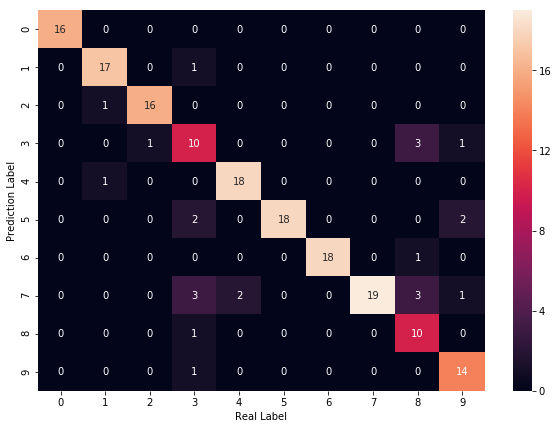

In [31]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [32]:
plt.hist(list_P)

(array([16., 18., 17., 15., 19., 22., 19., 28., 11., 15.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [33]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [34]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:139 index:[5] real:5
#1 min_error:173 index:[3] real:2
#2 min_error:169 index:[8] real:8
#3 min_error:54 index:[0] real:0
#4 min_error:147 index:[1] real:1
#5 min_error:117 index:[7] real:7
#6 min_error:88 index:[6] real:6
#7 min_error:123 index:[3] real:3
#8 min_error:83 index:[2] real:2
#9 min_error:151 index:[1] real:1
#10 min_error:163 index:[7] real:7
#11 min_error:180 index:[7] real:4
#12 min_error:103 index:[6] real:6
#13 min_error:122 index:[3] real:3
#14 min_error:137 index:[1] real:1
#15 min_error:166 index:[3] real:3
#16 min_error:173 index:[7] real:9
#17 min_error:133 index:[1] real:1
#18 min_error:148 index:[7] real:7
#19 min_error:72 index:[6] real:6
#20 min_error:167 index:[8] real:8
#21 min_error:90 index:[4] real:4
#22 min_error:119 index:[3] real:3
#23 min_error:145 index:[1] real:1
#24 min_error:91 index:[4] real:4
#25 min_error:68 index:[0] real:0
#26 min_error:108 index:[5] real:5
#27 min_error:112 index:[3] real:3
#28 min_error:124 index:[6] real:6
#2